In [1]:
pip install nltk

In [28]:
#Revisión de varios modelos de clasificación

# 1. Importación de bibliotecas

import nltk
import random
from nltk.corpus import movie_reviews
# Descargar el recurso 'punkt'
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# 2. Definición del cojunto de datos etiquetados

# Datos adaptados de: https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data
# Se filtró y tomó los datos 0 - negative y 4 - positive

import csv

# Ruta a tu archivo de etiquetas
Train_sentiment = 'Train_Sentiment.csv'

# Leer el archivo CSV y convertirlo en una lista de tuplas
data = []
try:
    with open(Train_sentiment, newline='', encoding='utf-8') as csvfile:
        # Usa DictReader con el delimitador correcto
        reader = csv.DictReader(csvfile, delimiter=';')
        for line_num, row in enumerate(reader, start=1):
            phrase = row.get('Phrase')
            sentiment = row.get('Sentiment')
            if phrase and sentiment:
                data.append((phrase, sentiment))
            else:
                print(f"Advertencia: Línea incorrecta en {line_num}: {row}")
except FileNotFoundError as e:
    print("Error: El archivo no fue encontrado.", e)
except csv.Error as e:
    print("Error al leer el archivo CSV:", e)

# Mostrar las primeras filas de la lista de tuplas para verificar que se ha leído correctamente
for i in range(min(5, len(data))):
    print(data[i])

# Mostrar la cantidad total de datos leídos
print()
print(f"Cantidad total de datos leídos: {len(data)}")

('This quiet , introspective and entertaining independent is worth seeking .', 'positive')
('quiet , introspective and entertaining independent', 'positive')
('entertaining', 'positive')
('is worth seeking', 'positive')
('would have a hard time sitting through this one', 'negative')

Cantidad total de datos leídos: 18412


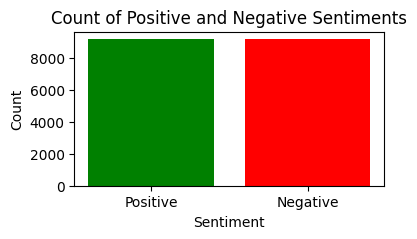

Positive count: 9206
Negative count: 9206


In [30]:
# Contar la cantidad de comentarios positivos y negativos

positive_count = sum(1 for _, label in data if label == "positive")
negative_count = sum(1 for _, label in data if label == "negative")

# Crear la gráfica
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(4, 2))  # Ancho 6 pulgadas, Alto 4 pulgadas
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Positive and Negative Sentiments')
plt.show()
print("Positive count:",positive_count)
print("Negative count:",negative_count)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


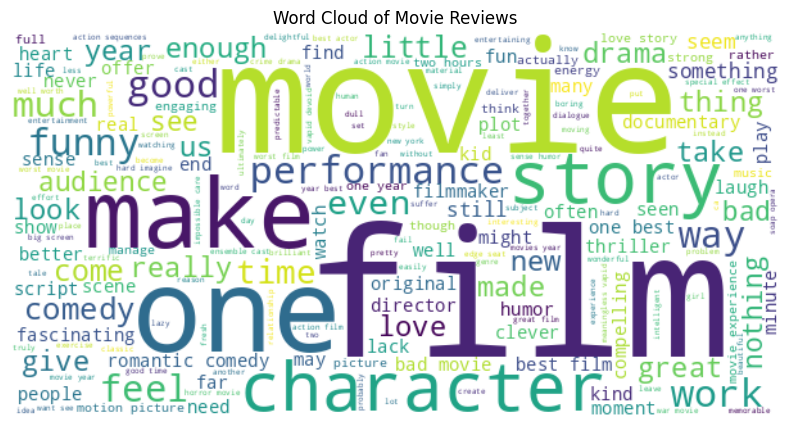

In [31]:
# Muertra la nube de palabras

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(' '.join(all_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


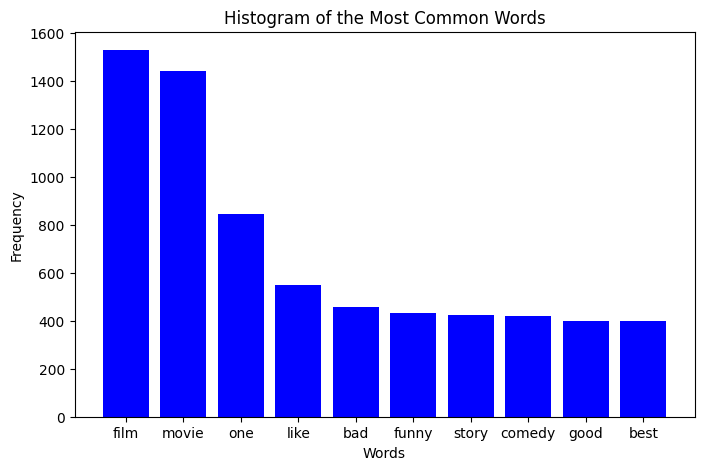

In [32]:
# Muestra el histograma de las palabras

import matplotlib.pyplot as plt
from collections import Counter

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Preprocesar los textos
all_words = []
stop_words = set(stopwords.words('english'))

for text, label in data:
    words = word_tokenize(text.lower())  # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Eliminar puntuación y stopwords
    all_words.extend(words)

# Contar la frecuencia de las palabras
word_freq = Counter(all_words)

# Seleccionar las palabras más comunes
common_words = word_freq.most_common(10)

# Crear listas de palabras y sus frecuencias
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# Generar el histograma
plt.figure(figsize=(8, 5))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of the Most Common Words')
plt.show()

In [33]:
# 3. Preprocesamiento de datos

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Asegurando los recursos necesarios de NLTK descargados
nltk.download('punkt')
nltk.download('wordnet')

# Inicializa el lematizador
lemmatizer = WordNetLemmatizer()

# Preprocesamiento de datos: tokenización, lematización y extracción de características
#def preprocess_data(text):
#    tokens = word_tokenize(text)
#    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
#    return {word: True for word in lemmatized_tokens}

# Preprocesamiento de datos: tokenización, lematización y extracción de características
def preprocess_data(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    return " ".join(lemmatized_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# 4. Aplicación de preprocesamiento a los datos

# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess_data(text), label) for (text, label) in data]


In [37]:
# 5. División de datos
from sklearn.model_selection import train_test_split

# Dividimos los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

print(f"Cantidad de datos de entrenamiento: {len(train_set)}")
print(f"Cantidad de datos de prueba: {len(test_set)}")

# Convertir datos de entrenamiento y prueba a formato utilizable por sklearn
train_features = [features for features, label in train_set]
train_labels = [label for features, label in train_set]
test_features = [features for features, label in test_set]
test_labels = [label for features, label in test_set]

# Vectorización de los datos
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_features)
X_test = vectorizer.transform(test_features)

Cantidad de datos de entrenamiento: 14729
Cantidad de datos de prueba: 3683


In [38]:
# 6. Entrenamiento con varios clasificadores

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Definir los modelos a comparar

models = {
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, train_labels)
    predicted_labels = model.predict(X_test)
    accuracy = accuracy_score(test_labels, predicted_labels)
    f1 = f1_score(test_labels, predicted_labels, pos_label='positive')
    results.append((model_name, accuracy, f1))
    print(f"{model_name} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")



Naive Bayes - Accuracy: 0.93, F1 Score: 0.93
Decision Tree - Accuracy: 0.91, F1 Score: 0.91
SVM - Accuracy: 0.94, F1 Score: 0.94
Logistic Regression - Accuracy: 0.94, F1 Score: 0.95
Random Forest - Accuracy: 0.93, F1 Score: 0.92


In [39]:
# 7. Evaluación del clasificador
import pandas as pd

# Convertir resultados a un DataFrame para mejor visualización
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
print(results_df)

# Seleccionar el mejor modelo
best_model_name, best_accuracy, best_f1 = max(results, key=lambda item: item[1])
best_model = models[best_model_name]

                 Model  Accuracy  F1 Score
0          Naive Bayes  0.930491  0.931915
1        Decision Tree  0.907141  0.908065
2                  SVM  0.940538  0.940473
3  Logistic Regression  0.944882  0.945678
4        Random Forest  0.925061  0.924918


In [40]:
# Evaluar el mejor modelo
predicted_labels = best_model.predict(X_test)

<Figure size 400x200 with 0 Axes>

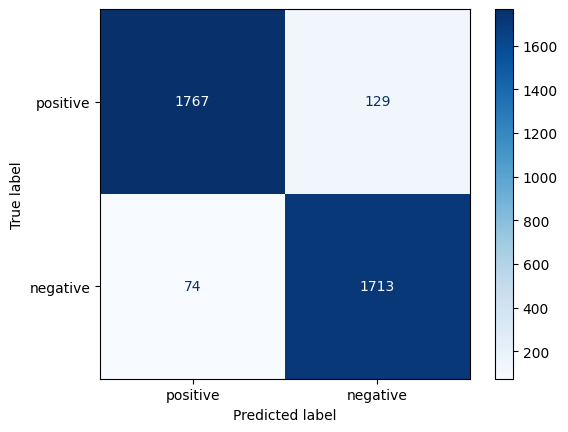

In [41]:
# Matriz de confusión

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels, labels=["positive", "negative"])
plt.figure(figsize=(4, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


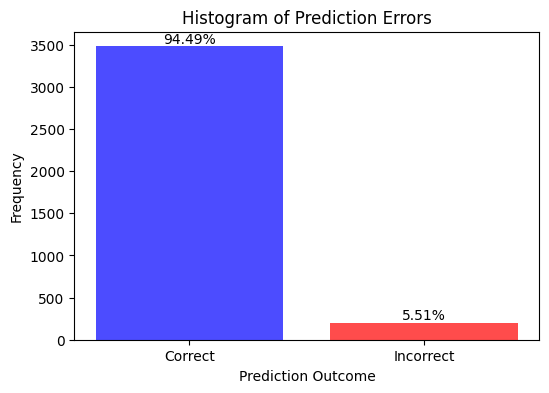

Correct Count: 3480 (94.49%)
Incorrect Count: 203 (5.51%)


In [71]:
import matplotlib.pyplot as plt

# Calcular los errores
correct_count = sum(1 for true_label, predicted_label in zip(test_labels, predicted_labels) if true_label == predicted_label)
incorrect_count = len(test_labels) - correct_count

# Calcular los porcentajes
total_count = len(test_labels)
correct_percentage = (correct_count / total_count) * 100
incorrect_percentage = (incorrect_count / total_count) * 100

# Crear los datos para el histograma de errores
error_counts = [correct_count, incorrect_count]
error_percentages = [correct_percentage, incorrect_percentage]
error_labels = ['Correct', 'Incorrect']

# Crear el histograma de errores utilizando un bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(error_labels, error_counts, color=['blue', 'red'], alpha=0.7)

# Añadir los porcentajes encima de las barras
for bar, percentage in zip(bars, error_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

print(f"Correct Count: {correct_count} ({correct_percentage:.2f}%)")
print(f"Incorrect Count: {incorrect_count} ({incorrect_percentage:.2f}%)")

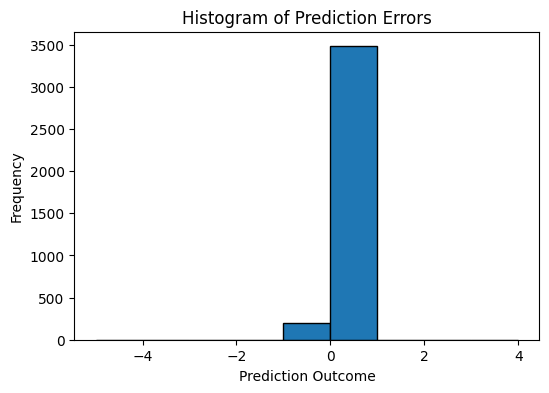

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular los errores como la diferencia entre etiquetas predichas y verdaderas
errors = np.array(predicted_labels) != np.array(test_labels)

# Convertir errores booleanos a enteros (0 para correcto, -1 para incorrecto)
error_int = np.where(errors, -1, 0)

# Crear el histograma de errores con barras más delgadas
plt.figure(figsize=(6, 4))
#plt.hist(error_int, bins=[-1, 0, 1], edgecolor='black', align='mid', rwidth=0.5)  # Ajustar rwidth para barras más delgadas
plt.hist(error_int, bins=range(-5, 5), edgecolor='black', align='mid')
#plt.xticks([-1, 0], ['-1', '0'])
plt.xlabel('Prediction Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

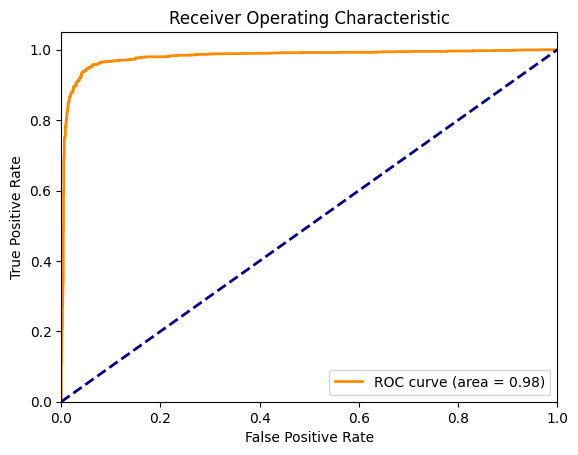

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc

# Calcular y mostrar la curva ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, y_prob, pos_label='positive')
roc_auc = roc_auc_score(test_labels, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [48]:
# Probar el mejor modelo con nuevos textos negativos

new_texts = [
    "This film was a complete waste of time.",
    "The plot was predictable and boring.",
    "The performances were very mediocre.",
    "The script lacked originality and depth.",
    "The movie had too many clichés.",
    "I couldn't connect with any of the characters.",
    "The direction was weak and disorganized.",
    "The cinematography did not do justice to the story.",
    "The pacing was too slow and tedious.",
    "The ending was disappointing and senseless.",
    "The action scenes were confusing and poorly choreographed.",
    "The background music was irritating and out of place.",
    "The plot development was very poor.",
    "The special effects were of very low quality.",
    "The dialogue was flat and emotionless.",
    "The humor was not funny at all.",
    "The plot fell apart in the second half.",
    "The film tried to be profound but failed.",
    "The pacing of the movie was uneven and offbeat.",
    "The editing was chaotic and disorganized.",
    "The movie had too many unnecessary characters.",
    "The pace was so slow I fell asleep.",
    "The scenes dragged on without adding anything to the plot.",
    "The film lacked a clear direction.",
    "The villain was neither believable nor intimidating.",
    "The movie promised a lot and delivered very little.",
    "The performances were forced and unnatural.",
    "The character development was superficial.",
    "The story was a repetition of other films.",
    "The dialogue was full of clichés.",
    "The main plot got lost among boring subplots.",
    "The humor seemed out of place and forced.",
    "The movie failed to keep my interest at any point.",
    "The film was a major disappointment in every aspect.",
    "The narrative was confusing and disorganized.",
    "The dramatic moments were exaggerated and ineffective.",
    "The chemistry between the actors was non-existent.",
    "The film lacked tension and emotion.",
    "The movie tried to be epic but failed miserably.",
    "The key scenes were hard to follow.",
    "The pacing of the film felt torturous.",
    "The plot felt stagnant and directionless.",
    "The ending was abrupt and lacked proper resolution.",
    "The movie was full of mistakes and technical flaws.",
    "The characters were one-dimensional and predictable.",
    "The film had an incoherent narrative.",
    "The script was full of insipid dialogue.",
    "The film had no surprises or interesting twists.",
    "The setting was generic and unimaginative.",
    "The film failed to engage me with the story at all."
]

# Definir la etiqueta esperada
etiqueta_esperada = "negative"

# Inicializar el contador de aciertos
aciertos = 0

# Realizar la clasificación y contar los aciertos
for new_text in new_texts:
    new_text_preprocessed = preprocess_data(new_text)
    new_text_vectorized = vectorizer.transform([new_text_preprocessed])
    predicted_label = best_model.predict(new_text_vectorized)[0]  # Usar el método predict

    if predicted_label == etiqueta_esperada:
        aciertos += 1

# Calcular el porcentaje de aciertos
porcentaje_aciertos = (aciertos / len(new_texts)) * 100

print(f"Porcentaje de aciertos: {porcentaje_aciertos:.2f}%")

Porcentaje de aciertos: 94.00%
